In [5]:
# Importing core libraries
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
from imblearn.over_sampling import ADASYN

# Model selection
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer

# Data transformation pipelines
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Importing from Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FactorAnalysis

# TensorFlow 
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import Adam, Nadam
from keras.layers import Input, Embedding, Reshape, GlobalAveragePooling1D
from keras.layers import Flatten, concatenate, Concatenate, Lambda, Dropout, SpatialDropout1D
from keras.layers import Reshape, MaxPooling1D,BatchNormalization, AveragePooling1D, Conv1D
from keras.layers import Activation, LeakyReLU
from keras.optimizers import SGD, Adam, Nadam
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.regularizers import l2, l1_l2
from keras.losses import binary_crossentropy
from keras.utils import get_custom_objects
from keras.layers import Activation, LeakyReLU

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [243]:
df = pd.read_csv('cleaned-outcomes-no-hypertension.csv')
pd.set_option('display.max_columns', None)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,30850-0.0,30780-0.0,30690-0.0,30790-0.0,23101-0.0,23099-0.0,48-0.0,23100-0.0,30710-0.0,30760-0.0,30640-0.0,30750-0.0,49-0.0,30770-0.0,30740-0.0,30630-0.0,30870-0.0,21001-0.0,1488-0.0,4079-0.0,1299-0.0,21003-0.0,1160-0.0,1438-0.0,4080-0.0,1458-0.0,1528-0.0,1319-0.0,845-0.0,1289-0.0,1309-0.0,1418-0.0,1329-0.0,1220-0.0,1428-0.0,1249-0.0,1349-0.0,1369-0.0,20117-0.0,2100-0.0,2654-0.0,1339-0.0,21000-0.0,2050-0.0,1408-0.0,1200-0.0,1538-0.0,31-0.0,6138-0.0,1359-0.0,1389-0.0,1478-0.0,2090-0.0,1508-0.0,1379-0.0,6142-0.0,1468-0.0,1548-0.0,1239-0.0,1448-0.0,hypertension,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_myocardial_infarction,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,multi-labels,age,gender,race
0,0.50800,3.88800,6.47700,133.3990,45.2,35.6,74.0,25.0,0.3400,1.70600,1.21100,35.114,102.0,26.33900,5.62200,1.59300,0.97700,24.5790,6.0,77.0,10.0,54.0,7.0,10.0,110.0,3.61,2.0,0.0,29.43,6.0,2.0,3,2,0,0,1,1,1,2,1,2,2,0,2,1,3,2,0,1,2,1,1,1,3,1,1,3,2,0,3,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]",54,Female,British
1,13.08800,3.52000,5.51200,15.4000,74.6,36.5,120.0,42.9,3.9400,1.17300,1.01900,40.900,113.0,10.70100,5.05200,1.39000,2.35800,35.0861,2.0,91.0,2.0,65.0,9.0,12.0,166.0,7.00,2.9,0.0,16.00,2.0,1.0,2,2,0,1,1,4,2,2,0,7,2,0,1,3,2,0,1,3,3,1,1,0,2,2,1,5,2,0,1,1,0,1,0,1,0,0,0,0,"[1, 0, 1, 0, 0, 0, 0, 0]",65,Male,British
2,10.42577,4.29128,6.62273,52.9086,71.7,29.7,112.0,30.3,3.5877,1.45487,1.24481,84.100,107.0,19.25991,13.35002,1.58814,2.10834,30.7934,0.0,99.0,2.0,55.0,7.0,10.0,135.0,7.00,2.0,0.0,21.00,3.0,1.0,2,1,0,0,1,2,1,2,0,7,2,0,1,2,2,1,1,3,3,2,1,0,2,2,1,4,2,0,3,1,0,1,0,0,0,1,1,1,"[0, 0, 1, 0, 0, 1, 1, 1]",55,Male,British
3,1.78800,2.88700,5.56500,47.5316,40.2,29.8,67.0,17.0,0.8700,2.11500,0.81000,36.400,91.0,31.67200,4.82700,1.89100,1.15700,20.7577,0.0,71.0,5.0,49.0,8.0,14.0,116.0,5.00,3.0,1.0,18.00,5.0,1.0,2,2,0,0,4,1,2,2,0,6,2,2,1,2,1,2,0,6,2,2,1,0,2,2,1,3,2,0,3,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]",49,Female,Irish
4,0.75600,2.67000,4.68000,4.7700,46.5,30.1,85.0,20.0,0.1800,1.49300,0.73300,34.200,105.0,42.20900,5.06300,1.86900,1.67700,25.9766,7.0,73.0,4.0,61.0,7.0,2.0,113.0,7.00,4.0,2.0,16.00,3.0,3.0,3,2,1,1,4,1,1,2,0,6,3,0,1,3,1,0,0,3,3,1,2,0,1,1,1,4,2,0,3,1,0,0,0,1,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]",61,Female,British


In [244]:
outcomes = ['outcome_myocardial_infarction','outcome_cardiomyopathies','outcome_ischemic_heart_disease','outcome_heart_failure','outcome_peripheral_vascular_disease','outcome_cardiac_arrest','outcome_cerebral_infarction','outcome_arrhythmia']

# classifying features by datatype for appropriate use in model
continuous_cols = df.iloc[:,:18].columns.to_list()
numerical_cols = df.iloc[:,18:18+13].columns.to_list()
categorical_cols = df.iloc[:,18+13:18+13+30].columns.to_list() # ordinal encoded
nominal_cats = ['1428-0.0','20117-0.0','2100-0.0','2654-0.0','21000-0.0','1538-0.0','31-0.0','6138-0.0','2090-0.0','1508-0.0','6142-0.0','1468-0.0','1239-0.0','1448-0.0','hypertension']

In [245]:
# test train split
X = df.iloc[:,:61]
y = df[outcomes[-1]]

### transform numeric features

In [247]:
scaler  = StandardScaler()
scaler.fit(X[continuous_cols+numerical_cols])

StandardScaler()

In [221]:
# quantile transformation of numeric variables
qt = QuantileTransformer(output_distribution='uniform')

for col in numerical_cols+continuous_cols:
    X[col] = qt.fit_transform(X[col].values.reshape(-1,1))
    
# remove low variance variables

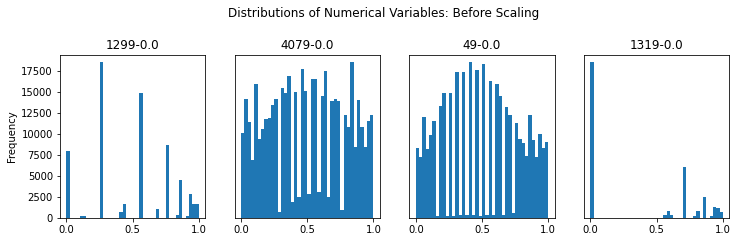

In [222]:
test_features = ['1299-0.0', '4079-0.0', '49-0.0', '1319-0.0']

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows=1, ncols=4, figsize = (12,3))
plt.suptitle('Distributions of Numerical Variables: Before Scaling', fontsize=12, y=1.1)

X[test_features[0]].plot(ax=ax1, kind='hist', bins=40, color='tab:blue').set_title(test_features[0])
X[test_features[1]].plot(ax=ax2, kind='hist', bins=40, color='tab:blue').set_title(test_features[1])
X[test_features[2]].plot(ax=ax3, kind='hist', bins=40,color='tab:blue').set_title(test_features[2])
X[test_features[3]].plot(ax=ax4, kind='hist', bins=40,color='tab:blue').set_title(test_features[3])

ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

In [248]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

### transform categorical features

In [249]:
# get_dummies on nominal categorical features & drop original cols
join = pd.concat([X_train,X_test],axis=0)
dummies = pd.get_dummies(join[nominal_cats], columns=nominal_cats, drop_first=True)
X_train[dummies.columns] = dummies.iloc[:len(X_train),:]
X_test[dummies.columns] = dummies.iloc[len(X_train):,:]
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)
print(dummies.shape)
# del(dummies)

X_train.drop(nominal_cats,axis=1,inplace=True)
X_test.drop(nominal_cats,axis=1,inplace=True)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_test

(64594, 58)


,30850-0.0,30780-0.0,30690-0.0,30790-0.0,23101-0.0,23099-0.0,48-0.0,23100-0.0,30710-0.0,30760-0.0,30640-0.0,30750-0.0,49-0.0,30770-0.0,30740-0.0,30630-0.0,30870-0.0,21001-0.0,1488-0.0,4079-0.0,1299-0.0,21003-0.0,1160-0.0,1438-0.0,4080-0.0,1458-0.0,1528-0.0,1319-0.0,845-0.0,1289-0.0,1309-0.0,1418-0.0,1329-0.0,1220-0.0,1249-0.0,1349-0.0,1369-0.0,1339-0.0,2050-0.0,1408-0.0,1200-0.0,1359-0.0,1389-0.0,1478-0.0,1379-0.0,1548-0.0,1428-0.0_1,1428-0.0_2,1428-0.0_3,20117-0.0_1,20117-0.0_2,2100-0.0_1,2654-0.0_4,2654-0.0_5,2654-0.0_6,2654-0.0_7,2654-0.0_8,2654-0.0_9,21000-0.0_1,21000-0.0_2,21000-0.0_3,21000-0.0_4,21000-0.0_5,21000-0.0_6,21000-0.0_7,21000-0.0_8,21000-0.0_9,21000-0.0_10,21000-0.0_11,21000-0.0_12,21000-0.0_13,21000-0.0_14,21000-0.0_15,21000-0.0_16,21000-0.0_17,21000-0.0_18,1538-0.0_1,1538-0.0_2,31-0.0_1,6138-0.0_2,6138-0.0_3,6138-0.0_4,6138-0.0_5,6138-0.0_6,2090-0.0_1,1508-0.0_2,1508-0.0_3,1508-0.0_4,6142-0.0_2,6142-0.0_3,6142-0.0_4,6142-0.0_5,6142-0.0_6,6142-0.0_7,1468-0.0_2,1468-0.0_3,1468-0.0_4,1468-0.0_5,1239-0.0_1,1239-0.0_2,1448-0.0_2,1448-0.0_3,1448-0.0_4,hypertension_1
51675,12.641,3.372,5.212,6.0500,55.5,17.1,80.0,11.5,1.56,1.520,0.979,58.8,93.0,20.343,14.475,1.773,1.042,21.3859,4.00,67.00,2.0,65.0,7.0,14.0,149.00,7.00,1.00,1.0,17.00,2.0,4.00,2,3,0,4,3,2,2,1,4,1,2,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
51676,1.272,4.916,6.968,15.9000,39.5,32.9,77.0,19.4,1.54,1.293,1.317,35.4,98.0,17.338,5.287,1.448,1.835,24.7934,2.00,76.00,4.0,58.0,8.0,0.0,150.00,7.00,6.00,2.0,20.00,6.0,4.00,3,3,1,4,0,1,3,1,1,2,2,2,1,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
51677,0.465,2.862,5.178,4.9600,46.2,46.5,90.0,40.1,2.42,1.609,0.835,37.2,108.0,26.551,4.404,1.621,1.182,29.8616,2.03,85.09,4.0,60.0,6.0,14.0,145.03,0.00,5.00,0.0,25.78,3.0,3.00,6,3,1,4,4,1,3,1,3,1,3,1,1,1,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
51678,9.545,4.239,6.441,21.6822,58.8,29.1,100.0,24.1,1.89,1.010,1.212,40.1,104.0,29.101,4.348,1.234,3.957,29.3722,4.00,86.00,3.0,46.0,8.0,15.0,130.00,0.00,3.00,1.0,25.99,3.0,2.00,2,1,0,3,1,1,3,4,1,2,2,0,3,2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
51679,1.100,3.704,5.835,15.8000,42.6,33.6,76.0,21.6,0.93,1.921,1.060,30.0,97.0,22.329,4.452,1.691,0.799,21.4508,6.00,72.00,1.0,49.0,7.0,10.0,120.00,0.00,3.00,2.0,25.38,3.0,4.00,2,1,0,4,1,2,1,1,3,2,3,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64589,0.841,5.251,7.362,183.8000,46.8,45.0,101.0,38.3,3.51,1.314,1.503,39.5,112.0,11.492,5.367,1.530,2.357,32.8305,10.00,86.00,1.0,62.0,6.0,10.0,136.00,0.00,0.00,0.0,15.00,6.0,0.00,2,1,0,4,0,2,2,1,3,3,3,2,1,0,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
64590,11.521,3.823,5.886,32.5000,56.0,23.7,94.0,17.4,0.75,1.252,1.187,43.4,96.0,16.981,5.786,1.429,2.537,23.4288,6.00,99.00,1.0,67.0,7.0,10.0,151.00,7.00,2.00,0.0,16.00,2.0,1.00,2,1,0,1,1,1,0,1,3,3,3,0,3,1,2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
64591,1.147,3.347,5.421,8.0300,46.8,38.6,88.0,29.4,1.66,1.451,0.961,36.1,107.0,14.276,4.439,1.507,1.540,27.6528,8.00,85.00,8.0,51.0,7.0,6.0,156.00,0.00,3.00,0.0,16.00,8.0,3.00,2,2,0,4,0,1,2,2,2,3,1,1,1,1,2,0,0,1,0,1,

### Oversampling on training data to address class imbalance

In [250]:
from imblearn.over_sampling import ADASYN

X_train,y_train= ADASYN().fit_resample(X_train,y_train)

### Build Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

In [65]:
# def create_baseline():
#     # create model
#     model = Sequential()
#     model.add(Dense(60, input_shape=(104,), activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     # Compile model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# # evaluate baseline model with standardized dataset
# estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)
# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [183]:
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import pydot
import seaborn as sns
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model


In [161]:
X_val

,30850-0.0,30780-0.0,30690-0.0,30790-0.0,23101-0.0,23099-0.0,48-0.0,23100-0.0,30710-0.0,30760-0.0,30640-0.0,30750-0.0,49-0.0,30770-0.0,30740-0.0,30630-0.0,30870-0.0,21001-0.0,1488-0.0,4079-0.0,1299-0.0,21003-0.0,1160-0.0,1438-0.0,4080-0.0,1458-0.0,1528-0.0,1319-0.0,845-0.0,1289-0.0,1309-0.0,1418-0.0,1329-0.0,1220-0.0,1249-0.0,1349-0.0,1369-0.0,1339-0.0,2050-0.0,1408-0.0,1200-0.0,1359-0.0,1389-0.0,1478-0.0,1379-0.0,1548-0.0,1428-0.0_1,1428-0.0_2,1428-0.0_3,20117-0.0_1,20117-0.0_2,2100-0.0_1,2654-0.0_4,2654-0.0_5,2654-0.0_6,2654-0.0_7,2654-0.0_8,2654-0.0_9,21000-0.0_1,21000-0.0_2,21000-0.0_3,21000-0.0_4,21000-0.0_5,21000-0.0_6,21000-0.0_7,21000-0.0_8,21000-0.0_9,21000-0.0_10,21000-0.0_11,21000-0.0_12,21000-0.0_13,21000-0.0_14,21000-0.0_15,21000-0.0_16,21000-0.0_17,21000-0.0_18,1538-0.0_1,1538-0.0_2,31-0.0_1,6138-0.0_2,6138-0.0_3,6138-0.0_4,6138-0.0_5,6138-0.0_6,2090-0.0_1,1508-0.0_2,1508-0.0_3,1508-0.0_4,6142-0.0_2,6142-0.0_3,6142-0.0_4,6142-0.0_5,6142-0.0_6,6142-0.0_7,1468-0.0_2,1468-0.0_3,1468-0.0_4,1468-0.0_5,1239-0.0_1,1239-0.0_2,1448-0.0_2,1448-0.0_3,1448-0.0_4,hypertension_1
17002,0.52100,3.808,6.498,5.1700,39.100,33.700,86.0,19.900,2.94,2.08500,1.019,31.300,97.0,17.585,4.32800,2.12900,1.254,22.7615,3.00,78.00,1.0,65.0,7.0,10.0,164.00,7.00,3.00,0.00,15.00,3.0,2.0,2,1,2,4,2,1,2,2,2,2,2,2,4,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1239,17.44100,3.946,6.521,58.4577,58.600,20.600,87.0,15.200,1.72,1.99200,1.137,33.400,99.0,17.098,5.53400,1.85900,0.768,22.0371,3.00,92.00,4.0,62.0,8.0,15.0,169.00,7.00,3.44,2.03,23.00,1.0,4.0,3,1,0,4,2,1,3,2,3,2,2,1,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
46961,7.28900,3.830,5.857,39.1043,62.600,28.500,105.0,24.900,3.32,1.17400,1.169,41.500,101.0,18.107,4.56100,1.38200,3.509,28.5714,3.00,84.84,2.0,63.0,7.0,28.0,146.23,0.00,1.00,0.00,15.00,1.0,0.0,2,1,0,1,3,3,1,1,2,2,2,3,4,1,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
22201,0.84600,4.764,7.300,127.8371,47.909,23.424,85.0,14.658,1.65,1.88700,1.361,35.300,103.0,13.172,4.43300,1.71000,0.469,25.0426,5.00,71.00,6.0,68.0,6.0,4.0,121.00,4.62,3.00,1.00,29.74,6.0,4.0,2,3,0,1,1,3,2,1,3,3,3,1,3,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
47134,1.04328,4.499,7.075,5.4900,42.300,38.600,89.0,26.500,1.20,1.47000,1.442,32.200,106.0,21.180,5.41200,1.57500,2.315,29.7784,3.00,63.00,3.0,63.0,6.0,10.0,155.00,5.00,1.00,1.00,16.00,3.0,1.0,2,1,0,4,1,3,3,2,1,1,3,2,2,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35218,18.43200,2.511,4.237,10.5000,63.900,11.000,81.0,7.900,0.99,1.56100,0.692,32.800,93.0,15.631,4.82900,1.53200,0.543,22.4088,8.00,88.00,1.0,62.0,9.0,15.0,143.00,5.00,2.00,1.00,15.00,3.0,2.0,2,1,1,4,3,1,2,1,3,2,2,1,1,2,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
32343,7.77400,2.294,3.566,5.7300,71.700,30.800,109.0,31.900,1.52,0.77600,0.748,43.300,115.0,24.651,4.18000,1.08300,1.820,30.9355,4.49,66.00,4.0,66.0,8.0,28.0,130.00,2.00,2.00,0.00,15.00,4.0,2.0,2,3,1,1,2,1,2,1,3,3,2,1,2,1,2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
25945,1.22700,2.612,4.415,13.5000,43.800,38.900,86.0,27.900,2.46,1.48053,0.817,36.394,101.0,20.235,4.95411,1

In [258]:
t_model = Sequential()
t_model.add(Dense(200, activation='tanh', input_shape=(X_train.shape[1],)))
t_model.add(Dense(50, activation='tanh'))
t_model.add(Dense(1, activation=tf.nn.sigmoid))

t_model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.000001),
    metrics=[metrics.mae])

# Compile model
# t_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [252]:
model = Sequential()
model.add(Dense(100, input_shape=(104,), activation='relu'))
model.add(Dense(150, activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(1, activation='softmax'))

# Compile model
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt = SGD(learning_rate=0.00001, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])

In [ ]:
y_val.value_counts()

In [255]:
epochs = 200
batch = 64

history = model.fit(
    X_train, y_train,
    batch_size=batch,
    epochs=epochs,
    shuffle=True,
    verbose=1,
#     validation_split=0.33
    validation_data=(X_val, y_val),
)
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/200
925/925 [==============================] - 3s 3ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 2/200
925/925 [==============================] - 3s 3ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 3/200
925/925 [==============================] - 3s 3ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 4/200
925/925 [==============================] - 3s 3ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 5/200
925/925 [==============================] - 3s 3ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 6/200
925/925 [==============================] - 5s 5ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 7/200
925/925 [==============================] - 6s 6ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684

Epoch 58/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 59/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 60/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 61/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 62/200
925/925 [==============================] - 4s 5ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 63/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 64/200
925/925 [==============================] - 6s 7ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy:

Epoch 115/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 116/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 117/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 118/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 119/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 120/200
925/925 [==============================] - 4s 5ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 121/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_ac

925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 172/200
925/925 [==============================] - 4s 4ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 173/200
925/925 [==============================] - 10s 11ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 174/200
925/925 [==============================] - 7s 8ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 175/200
925/925 [==============================] - 14s 15ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 176/200
925/925 [==============================] - 15s 16ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy: 0.2684
Epoch 177/200
925/925 [==============================] - 12s 13ms/step - loss: 1.9394 - accuracy: 0.5151 - val_loss: 2.9265 - val_accuracy

In [256]:
score

[2.9686508178710938, 0.25783729553222656]

Text(0.5, 0, 'Epoch')

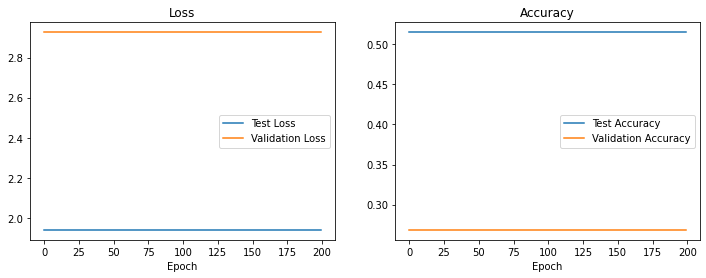

In [257]:
# Plot Model Loss and Model accuracy
    # list all data in history
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title("Loss")
axes[0].plot(history.history["loss"])
axes[0].plot(history.history["val_loss"])
axes[0].legend(["Test Loss", "Validation Loss"])
axes[0].set_xlabel ("Epoch")

axes[1].set_title("Accuracy")
axes[1].plot(history.history["accuracy"])
axes[1].plot(history.history["val_accuracy"])
axes[1].legend(["Test Accuracy", "Validation Accuracy"])
axes[1].set_xlabel ("Epoch")

### Save Model